In [16]:
import sys
import os
import rasterio
import rasterio.warp

import geopandas as gpd


# Import raster helpers
sys.path.insert(0, "/home/wb411133/Code/gostrocks/src")

import GOSTRocks.rasterMisc as rMisc
import GOSTRocks.mapMisc as mapMisc
from GOSTRocks.misc import tPrint

# Import GOST urban functions
sys.path.append("../../../src")

# Import local functions
from novelUrbanization import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
global_bounds = "/home/public/Data/GLOBAL/ADMIN/Admin0_Polys.shp"
global_bounds_adm2 = "/home/public/Data/GLOBAL/ADMIN/Admin2_Polys.shp"

runSmall = True
runLarge = True

gha_folder = (
    "/home/wb411133/data/Projects/MR_Novel_Urbanization/Data/GHA_URBAN_DATA_new_naming"
)
ghsl_data = "/home/public/Data/GLOBAL/GHSL/Built/GHS_BUILT_S_E{year}_GLOBE_R2023A_54009_100_V1_0.tif"
template_data = os.path.join(gha_folder, "FINAL_STANDARD", "gha_cpo20.tif")
out_ghsl = os.path.join(gha_folder, "ghsl_{year}_250m.tif")

In [6]:
inG = gpd.read_file(global_bounds)
inG2 = gpd.read_file(global_bounds_adm2)

In [13]:
ghsl_data.format(year=yr)

'/home/public/Data/GLOBAL/GHSL/Built/GHS_BUILT_S_E1990_GLOBE_R2023A_54009_100_V1_0.tif'

In [24]:
for yr in [2020, 2015, 2010, 2005, 2000, 1995, 1990]:
    cur_ghsl = rasterio.open(ghsl_data.format(year=yr))
    tPrint(yr)

    # need to scale ghsl data to 250m data
    res = rMisc.standardizeInputRasters(
        cur_ghsl,
        in_template,
        inR1_outFile=out_ghsl.format(year=yr),
        resampling_type="sum",
    )

11:20:43	2020
11:20:44	2015
11:20:46	2010
11:20:47	2005
11:20:49	2000
11:20:51	1995
11:20:52	1990


<module 'matplotlib.pyplot' from '/home/wb411133/.conda/envs/geog/lib/python3.9/site-packages/matplotlib/pyplot.py'>

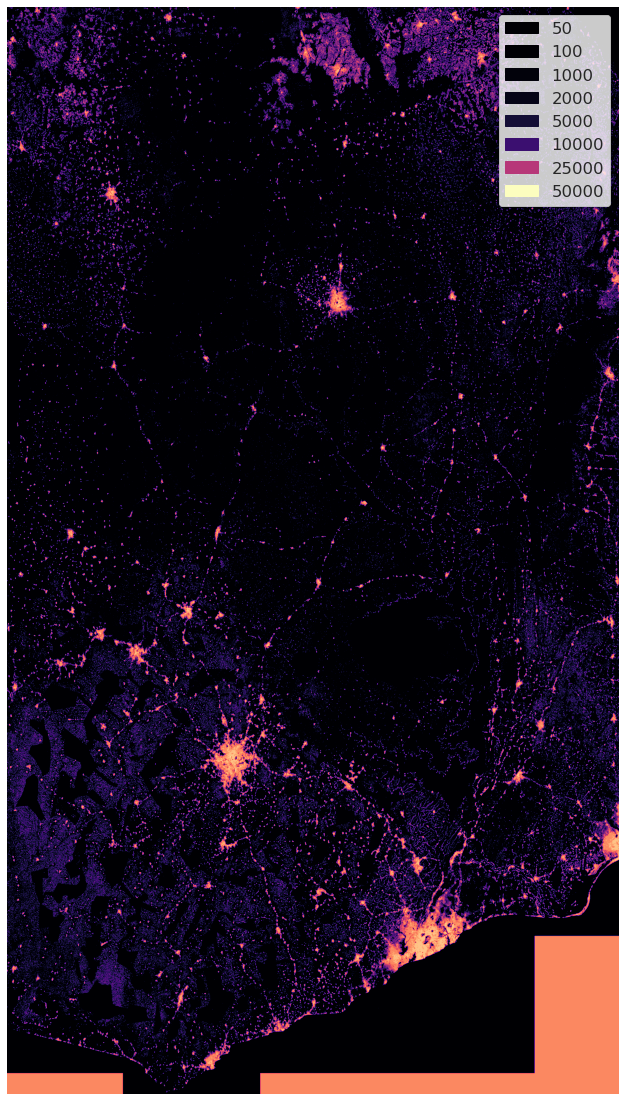

In [22]:
yr = 2020
curD = rasterio.open(out_ghsl.format(year=yr))
mapMisc.static_map_raster(
    curD, figsize=(20, 20), thresh=[50, 100, 1000, 2000, 5000, 10000, 25000, 50000]
)

<module 'matplotlib.pyplot' from '/home/wb411133/.conda/envs/geog/lib/python3.9/site-packages/matplotlib/pyplot.py'>

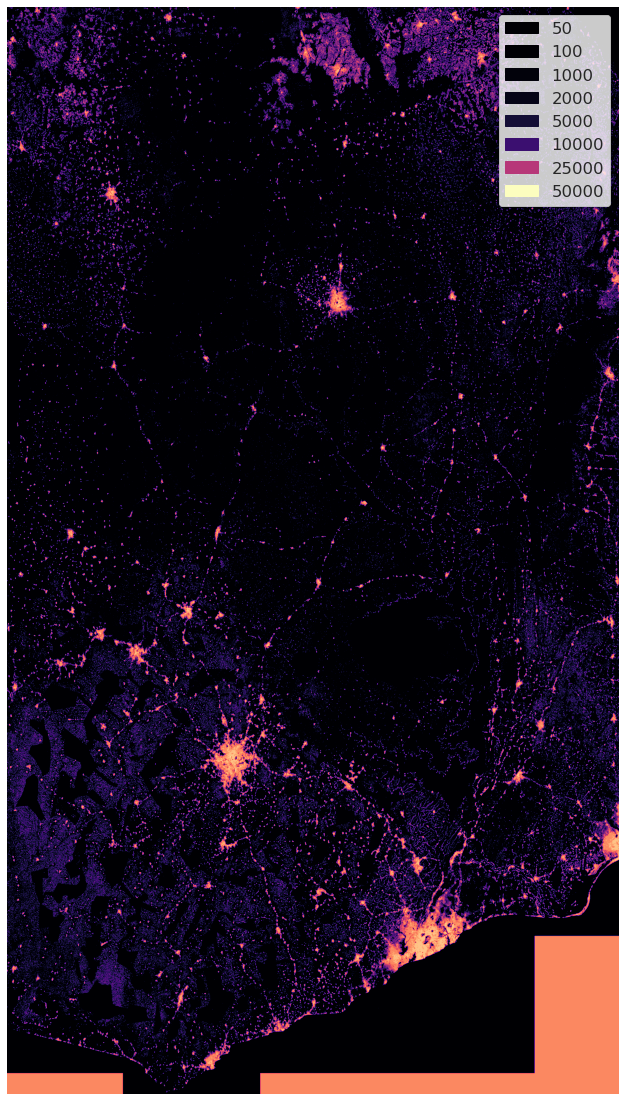

In [23]:
yr = 2000
curD = rasterio.open(out_ghsl.format(year=yr))
mapMisc.static_map_raster(
    curD, figsize=(20, 20), thresh=[50, 100, 1000, 2000, 5000, 10000, 25000, 50000]
)